## predicting the no using logistic regression 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
digits=load_digits()

In [3]:
data=digits.data
target=digits.target

In [4]:
print(data.shape)
print(data.ndim)
val=data[1].reshape(8,8)
t=target[1]
val

(1797, 64)
2


array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [5]:
print(target.shape)
print(target.ndim)
target[:5]

(1797,)
1


array([0, 1, 2, 3, 4])

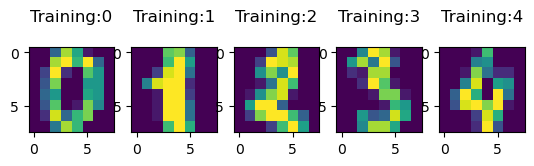

In [6]:
for index, (image,label) in enumerate(zip(data[:5],target[:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)))
    plt.title('Training:%i\n'%label)

for i , (a,b) in enumerate (zip(d1,d2)) 
i -> for loop index 
a -> d1 
b-> d2 
subplot for ploting multiple graphs (row , column , indexing ) 
imshow for showing the images according to the points value 


In [7]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(data,target,test_size=0.3,random_state=3)

In [8]:
print(X_train.shape)

(1257, 64)


In [9]:
print(y_train.shape)

(1257,)


In [10]:
from sklearn.linear_model import LogisticRegression 

In [11]:
lr=LogisticRegression()
lr

LogisticRegression()

In [12]:
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred=lr.predict(X_test)
print(y_pred[:5])
print(y_test[:5])
print(y_pred.shape,y_test.shape)
print(X_test[1].reshape(8,8).shape)

[0 4 1 2 0]
[0 4 1 2 0]
(540,) (540,)
(8, 8)


In [14]:
score=lr.score(X_test,y_test)
score

0.9537037037037037

In [15]:
from sklearn import metrics 
#from sklearn.metrics import confusion_matrix  'another way' 
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[64  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  1  0]
 [ 0  1 55  0  0  0  0  0  0  0]
 [ 0  0  1 54  0  0  0  0  1  0]
 [ 0  3  0  0 55  0  1  1  1  0]
 [ 0  1  0  0  1 45  0  0  0  2]
 [ 0  1  0  0  0  1 39  0  1  0]
 [ 0  0  0  0  0  0  0 56  1  0]
 [ 0  1  0  0  0  2  0  0 48  1]
 [ 0  0  0  0  1  1  0  0  1 44]]


the diagonal represents the correct prediction and calucates the accuracy is that adding all the diagonal values and dividing with the total values 

Text(0.5, 1.0, 'accuracy is: 0.954')

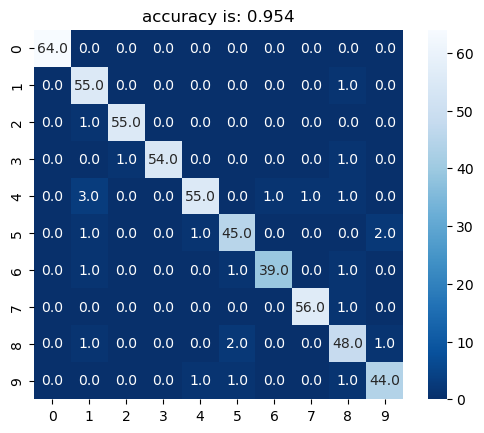

In [27]:
sns.heatmap(cm,annot=True,fmt='.1f',cmap='Blues_r',square=True)
plt.title('accuracy is: %.3f'%score)

In [42]:
#why is it not working with ( score(y_pred,y_test))
#plt.figure(figsize=(20,3))
#for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
 #   plt.subplot(1,4, plotIndex +1)
  #  plt.imshow(np.reshape(x_test[wrong], (8,8)),cmap=plt.cm.gray)
   # plt.title("Predicted: {}, Actual: {}" .format(predictions[wrong], y_test[wrong]), fontsize=20)

### showing misclassified elements

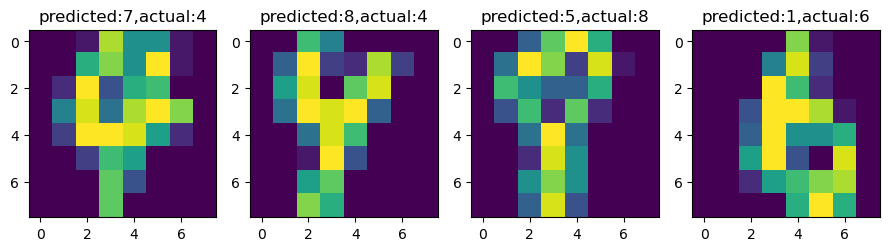

In [52]:
plt.figure(figsize=(9,9),tight_layout=True)
index=0
misclass=[]
for predict,actual in zip(y_pred,y_test):
    if predict!=actual:
        misclass.append(index)
    index+=1
    
for pindex,wrong in enumerate(misclass[:4]):
    plt.subplot(1,4,pindex+1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)))
    plt.title('predicted:{},actual:{}'.format(y_pred[wrong],y_test[wrong]))